In [3]:
from pathlib import Path 
import pandas as pd 
import numpy as np 
from datetime import datetime
import hvplot.pandas 
import panel as pn 

In [4]:
bitcoin_df = pd.read_csv(Path('Resources/Bitcoin Historical Data - Investing.com.csv'), parse_dates=True, 
                         infer_datetime_format=True, index_col = 'Date').sort_index()
bitcoin_df.tail()

,Price,Daily_Returns
Date,,
2020-04-11,6867.8,0.0007
2020-04-12,6917.6,0.0073
2020-04-13,6841.3,-0.0110
2020-04-14,6850.9,0.0014
2020-04-15,6736.9,-0.0166


In [5]:
bitcoin_df.head()

,Price,Daily_Returns
Date,,
2015-01-01,314.9,-0.0105
2015-01-02,315.2,0.0010
2015-01-03,287.1,-0.0891
2015-01-04,264.7,-0.0780
2015-01-05,274.8,0.0382


In [6]:
bitcoin_df['Volatility'] = bitcoin_df.Daily_Returns.rolling(window=30).std()
bitcoin_df.dropna(inplace=True)

In [7]:
bitcoin_df.head()

,Price,Daily_Returns,Volatility
Date,,,
2015-01-30,231.8,-0.0092,0.088220
2015-01-31,218.5,-0.0575,0.088707
2015-02-01,225.3,0.0310,0.088983
2015-02-02,238.9,0.0602,0.088419
2015-02-03,227.4,-0.0479,0.087697


In [8]:
bitcoin_twr = pd.read_csv(Path('Resources/coindesk_btc.csv'), parse_dates=True, infer_datetime_format=True)
bitcoin_twr.drop(columns=['username','to','favorites','geo','mentions','hashtags','id','permalink'], inplace=True)
bitcoin_twr.head()
#change date column to datetime
bitcoin_twr['date'] = pd.to_datetime(bitcoin_twr['date'], format='%Y-%m-%d')
# Remove timestamp
bitcoin_twr['date']=bitcoin_twr['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
# change index to date
bitcoin_twr.set_index('date', inplace = True)
bitcoin_twr.index = pd.to_datetime(bitcoin_twr.index)
bitcoin_twr.head()

,replies,retweets,text
date,,,
2020-04-13,3,10,MARKET WRAP: Bearish signals have analysts sea...
2020-04-13,2,5,IN DEPTH: As the EU navigates privacy protecti...
2020-04-13,0,6,Renowned economist and author Carlota Perez @C...
2020-04-13,2,9,IN DEPTH: Engineers in the Midwest are creatin...
2020-04-13,1,12,NEW: @HuobiGlobal has launched a new in-house ...


In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# Code to download wordnet corpora
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def process_text(doc):
   # doc = str(doc)
    sw = set(stopwords.words('english'))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemm_words = [lemmatizer.lemmatize(word) for word in words]
    final_words = [word.lower() for word in lemm_words if word.lower() not in sw]
    #returns a large string of all words from all articles in corpus
    return ' '.join(final_words)

In [11]:
for row, column in bitcoin_twr.items():
    if column.name == 'text':
        #print(column.name)
        bitcoin_twr[column.name] = bitcoin_twr[column.name].apply(lambda x: process_text(x))

In [12]:
bitcoin_twr.sort_index(inplace=True)
bitcoin_twr.head()

,replies,retweets,text
date,,,
2018-02-12,6,30,dont miss upcoming cryptocurrency capital mark...
2018-02-12,49,464,jpmorgan report crypto could one day help dive...
2018-02-13,5,35,russian ministry proposes capital mandates ico...
2018-02-13,19,43,better late never time regulators put crypto n...
2018-02-13,15,183,expect congress talks blockchain tomorrow http...


### Using Mohan's Funtions

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
def retVComp(text):
    """
        Accepts a string of text and Returns compound from polarity scoring in the form of a FLOAT
    """
    return analyzer.polarity_scores(text)['compound']

In [15]:
sentList = []
for row in bitcoin_twr['text']:
    sentList.append(retVComp(row))

bitcoin_twr['sentiment'] = sentList
bitcoin_twr.head()

,replies,retweets,text,sentiment
date,,,,
2018-02-12,6,30,dont miss upcoming cryptocurrency capital mark...,0.5781
2018-02-12,49,464,jpmorgan report crypto could one day help dive...,0.4019
2018-02-13,5,35,russian ministry proposes capital mandates ico...,0.0000
2018-02-13,19,43,better late never time regulators put crypto n...,0.4404
2018-02-13,15,183,expect congress talks blockchain tomorrow http...,0.0000


In [16]:
possible_df=bitcoin_twr[['replies','retweets',
                         'sentiment']].groupby(bitcoin_twr.index.date).sum()

In [17]:
possible_df.head()

,replies,retweets,sentiment
2018-02-12,55,494,0.9800
2018-02-13,296,1230,0.9804
2018-02-14,452,2681,7.4990
2018-02-15,479,1732,0.0431
2018-02-16,387,1383,0.5844


In [18]:
join_df = possible_df.join(bitcoin_df,how='left')

### IGNORE THIS PART
join_df

join_df.iloc[:,feature_column]

 join_df.iloc[:2,[0,1,2]].to_numpy()

join_df.iloc[:2,[0,1,2]].to_numpy().shape

pd.DataFrame(x).to_numpy()

x[0]

join_df.tail()

join_df.columns

# LSTM MODEL

In [19]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [20]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number].to_numpy()
        target = df.iloc[(i + window), target_col_number]
        X.append([features])
        y.append(target)
    X = np.array(X)
    return X.reshape(len(X),window*len(feature_col_number)),np.array(y).reshape(-1, 1)

In [21]:
window_size = 10
# list of columns to pass as features
feature_column = [0,1,2,3,4]
# Target col is volatility
target_column = 5
X, y = window_data(join_df, window_size, feature_column, target_column)

In [22]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [23]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [24]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
#print (f"X_train sample values:\n{X_train[0]} \n")
#print (f"X_test sample values:\n{X_test[0]}")

In [25]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [26]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# layer 3
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# layer 4
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 5
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1,))

In [27]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [28]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 50, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 30)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 30)            7

In [29]:
# Train the model
# NOTE: verbose=0 will not print anything out
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=50, verbose=0)

In [35]:
# Evaluate the model
model.evaluate(X_test, y_test)

234/234 [==============================] - 0s 1ms/sample - loss: 0.0716


0.07160880701600486

In [36]:
# Make some predictions
predicted = model.predict(X_test)

In [37]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Create a DataFrame of Real and Predicted values
bitcoin_price= pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
bitcoin_price.head()

,Real,Predicted
0,0.035782,0.042500
1,0.036942,0.043567
2,0.035723,0.043614
3,0.035999,0.040820
4,0.036265,0.041098


In [38]:
bitcoin_price.tail()

,Real,Predicted
229,0.093817,0.031607
230,0.093834,0.031649
231,0.094486,0.031656
232,0.058719,0.031619
233,0.052073,0.031533


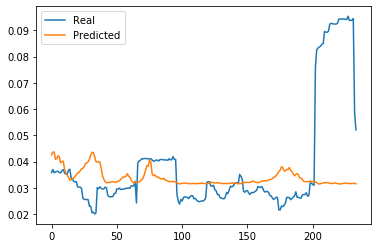

In [39]:
# Plot the real vs predicted prices as a line chart
bitcoin_price.plot()

In [81]:
def generate_graph(df=None):
    """This function will take in a df and return hvplot 
    """
    if df =='BTC':
        local_df = bitcoin_price
    fig = local_df.hvplot(
                                legend='top',
                                ylabel= 'Volatility',
                                xlabel='Date', 
                                #hover_cols=['Real','Predicted'],
                                hover=True,
                                width=800,
                                height=400
                                )
    return fig

In [82]:
"""
    This is a sample interactive graph with a widget selector for specific coin.
"""
coinSelector=pn.widgets.Select(name='Select Coin', value='BTC',options=['BTC', 'XRP', 'XLM','LTC','EOS','ETH','BCH','BSV','XMR', 'TRX'])
layout = pn.interact(generate_graph, df=coinSelector)

In [83]:
column=pn.Column('#LSTM',pn.Row(layout[0],layout[1]))
column

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Select(options=['BTC', 'XRP', ...], value='BTC')
        [1] Row
            [0] HoloViews(NdOverlay, name='interactive06136')